<a href="https://colab.research.google.com/github/jtunde/Python/blob/main/cn3-14.01.2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Setare index

In [47]:
df = pd.read_csv('drive/MyDrive/data.csv')
df['TIME'] = pd.to_datetime(df['TIME'])
df_idx = df.set_index(['TIME'], drop=True)
df_idx.head(5)

,RON
TIME,
2021-01-01,4.9493
2021-01-02,4.9493
2021-01-03,4.9493
2021-01-04,4.8713
2021-01-05,4.8721


#### Flip the dataframe

In [49]:
df_idx = df_idx.sort_index(axis=1, ascending=True)
df_idx = df_idx.iloc[::-1]

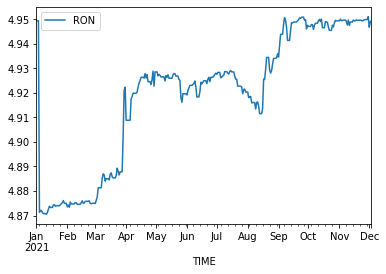

In [50]:
data = df_idx[['RON']]
data.plot(y='RON')

Separarea datelor

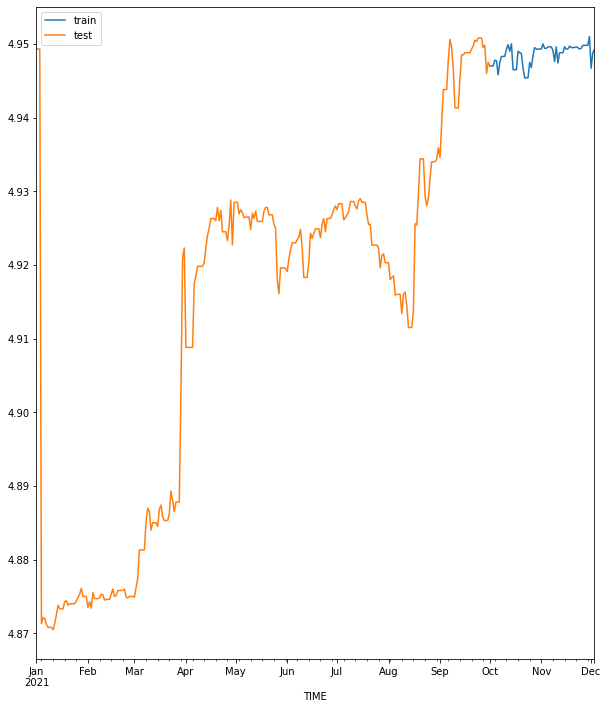

In [52]:
split_date = pd.Timestamp('10-01-2021')

train = data.loc[:split_date]
test = data.loc[split_date:]

ax = train.plot(figsize=(10,12))
test.plot(ax=ax)
plt.legend(['train', 'test'])
plt.show()

Normalizarea datelor

In [53]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [54]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

In [55]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (63 x 1)
Test size: (273 x 1)


In [56]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

In [57]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
#plt.plot(y_test)
#plt.plot(y_pred)

In [71]:
from sklearn.metrics import r2_score

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

r2_test = r2_score(y_test, y_pred)
print("R-squared is: %f"%r2_test)

R-squared is: -2.028472


Construire retea

In [73]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import keras.backend as K

1 strat ascuns cu 1 neuron

In [74]:
model = Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
4/4 [==============================] - 0s 4ms/step - loss: 1.4973
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 1.4894
Epoch 3/20
4/4 [==============================] - 0s 3ms/step - loss: 1.4815
Epoch 4/20
4/4 [==============================] - 0s 4ms/step - loss: 1.4733
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 1.4651
Epoch 6/20
4/4 [==============================] - 0s 3ms/step - loss: 1.4571
Epoch 7/20
4/4 [==============================] - 0s 3ms/step - loss: 1.4488
Epoch 8/20
4/4 [==============================] - 0s 3ms/step - loss: 1.4406
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 1.4323
Epoch 10/20
4/4 [==============================] - 0s 4ms/step - loss: 1.4238
Epoch 11/20
4/4 [==============================] - 0s 5ms/step - loss: 1.4155
Epoch 12/20
4/4 [==============================] - 0s 4ms/step - loss: 1.4071
Epoch 13/20
4/4 [==============================] - 0s 5ms/step - loss: 1.

R-Squared: -2.413952


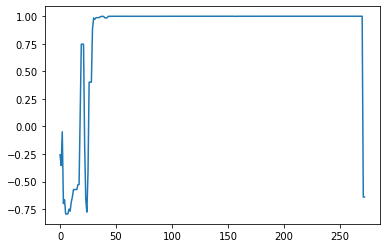

In [76]:
y_pred = model.predict(X_test)
#plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))